In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('Training Data.csv')
df_test = pd.read_csv('Test Data.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [4]:
df_train = df_train.drop(['current_job_years','city','Id'],axis=1)

subgrade_dummies = pd.get_dummies(df_train['married'],drop_first=True)
df_train = pd.concat([df_train.drop('married',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_train['house_ownership'],drop_first=True)
df_train = pd.concat([df_train.drop('house_ownership',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_train['car_ownership'],drop_first=True)
df_train = pd.concat([df_train.drop('car_ownership',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_train['profession'],drop_first=True)
df_train = pd.concat([df_train.drop('profession',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_train['current_house_years'],drop_first=True)
df_train = pd.concat([df_train.drop('current_house_years',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_train['state'],drop_first=True)
df_train = pd.concat([df_train.drop('state',axis=1),subgrade_dummies],axis=1)

from sklearn.preprocessing import MinMaxScaler

dfr = df_train['income']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)
scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_train['income'] = dfr

dfr = df_train['age']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)
scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_train['age'] = dfr

dfr = df_train['experience']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)
scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_train['experience'] = dfr

In [5]:
df_train.head()

,income,age,experience,risk_flag,single,owned,rented,yes,Analyst,Architect,Army_officer,Artist,Aviator,Biomedical_Engineer,Chartered_Accountant,Chef,Chemical_engineer,Civil_engineer,Civil_servant,Comedian,Computer_hardware_engineer,Computer_operator,Consultant,Dentist,Design_Engineer,Designer,Drafter,Economist,Engineer,Fashion_Designer,Financial_Analyst,Firefighter,Flight_attendant,Geologist,Graphic_Designer,Hotel_Manager,Industrial_Engineer,Lawyer,Librarian,Magistrate,...,Software_Developer,Statistician,Surgeon,Surveyor,Technical_writer,Technician,Technology_specialist,Web_designer,11,12,13,14,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Gujarat,Haryana,Himachal_Pradesh,Jammu_and_Kashmir,Jharkhand,Karnataka,Kerala,Madhya_Pradesh,Maharashtra,Manipur,Mizoram,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttar_Pradesh,Uttar_Pradesh[5],Uttarakhand,West_Bengal
0,0.129487,0.034483,0.15,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.757206,0.327586,0.50,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.398564,0.775862,0.20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.625263,0.344828,0.10,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.576454,0.448276,0.55,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
df_test = df_test.drop(['current_job_years','city','id'],axis=1)

subgrade_dummies = pd.get_dummies(df_test['married'],drop_first=True)
df_test = pd.concat([df_test.drop('married',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_test['house_ownership'],drop_first=True)
df_test = pd.concat([df_test.drop('house_ownership',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_test['car_ownership'],drop_first=True)
df_test = pd.concat([df_test.drop('car_ownership',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_test['profession'],drop_first=True)
df_test = pd.concat([df_test.drop('profession',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_test['current_house_years'],drop_first=True)
df_test = pd.concat([df_test.drop('current_house_years',axis=1),subgrade_dummies],axis=1)

subgrade_dummies = pd.get_dummies(df_test['state'],drop_first=True)
df_test = pd.concat([df_test.drop('state',axis=1),subgrade_dummies],axis=1)

from sklearn.preprocessing import MinMaxScaler

dfr = df_test['income']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)
scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_test['income'] = dfr

dfr = df_test['age']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)
scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_test['age'] = dfr

dfr = df_test['experience']
dfr = np.array(dfr)
dfr = dfr.reshape(-1,1)
scaler = MinMaxScaler()
dfr = scaler.fit_transform(dfr)
df_test['experience'] = dfr

In [7]:
df_test.head()

,income,age,experience,single,owned,rented,yes,Analyst,Architect,Army officer,Artist,Aviator,Biomedical Engineer,Chartered Accountant,Chef,Chemical engineer,Civil engineer,Civil servant,Comedian,Computer hardware engineer,Computer operator,Consultant,Dentist,Design Engineer,Designer,Drafter,Economist,Engineer,Fashion Designer,Financial Analyst,Firefighter,Flight attendant,Geologist,Graphic Designer,Hotel Manager,Industrial Engineer,Lawyer,Librarian,Magistrate,Mechanical engineer,...,Software Developer,Statistician,Surgeon,Surveyor,Technical writer,Technician,Technology specialist,Web designer,11,12,13,14,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Mizoram,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttar Pradesh[5],Uttarakhand,West Bengal
0,0.739054,0.655172,0.95,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.120596,0.068966,0.25,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.890037,0.500000,0.60,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.193614,0.482759,0.45,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.000312,0.068966,0.90,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = df_train.drop('risk_flag',axis=1)
y = df_train['risk_flag']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=101)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [56]:
model = Sequential()

model.add(Dense(89,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(45,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(23,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_cv,y_cv),callbacks=[earlystop],verbose=1)

Epoch 1/600
5513/5513 [==============================] - 19s 3ms/step - loss: 0.4092 - accuracy: 0.8744 - val_loss: 0.3671 - val_accuracy: 0.8769
Epoch 2/600
5513/5513 [==============================] - 16s 3ms/step - loss: 0.3632 - accuracy: 0.8771 - val_loss: 0.3497 - val_accuracy: 0.8769
Epoch 3/600
5513/5513 [==============================] - 16s 3ms/step - loss: 0.3490 - accuracy: 0.8786 - val_loss: 0.3349 - val_accuracy: 0.8769
Epoch 4/600
5513/5513 [==============================] - 16s 3ms/step - loss: 0.3430 - accuracy: 0.8783 - val_loss: 0.3283 - val_accuracy: 0.8769
Epoch 5/600
5513/5513 [==============================] - 15s 3ms/step - loss: 0.3378 - accuracy: 0.8776 - val_loss: 0.3226 - val_accuracy: 0.8769
Epoch 6/600
5513/5513 [==============================] - 16s 3ms/step - loss: 0.3296 - accuracy: 0.8791 - val_loss: 0.3127 - val_accuracy: 0.8769
Epoch 7/600
5513/5513 [==============================] - 15s 3ms/step - loss: 0.3285 - accuracy: 0.8772 - val_loss: 0.3132 -

In [58]:
df_loss = pd.DataFrame(model.history.history)

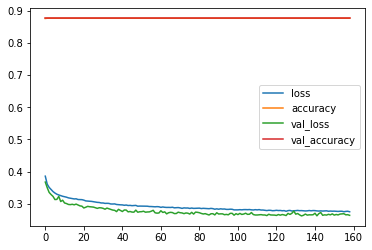

In [59]:
df_loss.plot()

In [60]:
val_loss,val_acc = model.evaluate(X_cv,y_cv)
print(val_loss)
print(val_acc)

2363/2363 [==============================] - 3s 1ms/step - loss: 0.2636 - accuracy: 0.8769
0.2636033296585083
0.8768783211708069


In [61]:
pred = np.argmax(model.predict(X_cv),-1)

In [64]:
THRESHOLD = 0.115
pred = np.where(model.predict_proba(X_cv) > THRESHOLD, 1, 0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [65]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report

print(roc_auc_score(y_cv,pred))
print()
print(accuracy_score(y_cv,pred))
print()
print(confusion_matrix(y_cv,pred))
print()
print(classification_report(y_cv,pred))

0.8329160732046375

0.8089285714285714

[[53106 13186]
 [ 1259  8049]]

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     66292
           1       0.38      0.86      0.53      9308

    accuracy                           0.81     75600
   macro avg       0.68      0.83      0.70     75600
weighted avg       0.90      0.81      0.84     75600



In [66]:
THRESHOLD = 0.115
pred = np.where(model.predict_proba(df_test) > THRESHOLD, 1, 0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [68]:
pred = pd.DataFrame(pred)

In [71]:
index = pd.DataFrame(range(1,28001))

In [72]:
index = pd.concat([index,pred],axis=1)

In [74]:
index.columns = ['id','risk_flag']

In [79]:
index.set_index('id',inplace=True)

In [81]:
index.to_csv('result_4.csv')

In [83]:
index

,risk_flag
id,
1,0
2,0
3,0
4,0
5,0
...,...
27996,0
27997,0
27998,0
